<a href="https://colab.research.google.com/github/fabianov2005/formacao_machine_learning_specialist/blob/main/Projeto_Transfer_Learning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Projeto Deep Learning através de Transfer Learning - Treinando para Reconhecer duas Classes (Shakira e ZAZ).



Montando ambiente para o projeto.

In [38]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras import applications
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import np_utils

In [16]:
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [17]:
root = '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset'
train_split, val_split = 0.7, 0.15
categories = [x[0] for x in os.walk(root) if x[0]][1:]
print(categories)

['/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/zaz']


In [18]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    print(images)
    for img_path in images:
        img, x = get_image(img_path)
        print(img)
        data.append({'x':np.array(x[0]), 'y':c})
num_classes = len(categories)
print(num_classes)

['/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira/23.png', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira/24.png', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira/22.png', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira/25.png', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira/27.png', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira/26.png', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/shakira/30.png', '/content/drive/MyDrive/Colab Notebooks/CienciaDadosMachineLearning/FormacaoMachineLearningSpecialist/dataset/

In [19]:
random.shuffle(data)

In [20]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [21]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(145, 2)


In [24]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 965 images from 2 categories
train / validation / test split: 675, 145, 145
training data shape:  (675, 224, 224, 3)
training labels shape:  (675, 2)


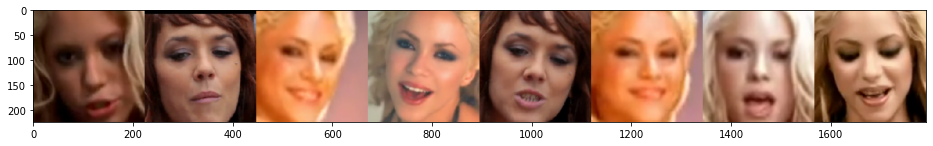

In [25]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [26]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                 

In [27]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
6/6 [==============================] - 44s 7s/step - loss: 0.6747 - accuracy: 0.6030 - val_loss: 0.6920 - val_accuracy: 0.5310
Epoch 2/10
6/6 [==============================] - 38s 6s/step - loss: 0.6715 - accuracy: 0.5941 - val_loss: 0.6827 - val_accuracy: 0.5310
Epoch 3/10
6/6 [==============================] - 38s 6s/step - loss: 0.6506 - accuracy: 0.5941 - val_loss: 0.6781 - val_accuracy: 0.5310
Epoch 4/10
6/6 [==============================] - 40s 7s/step - loss: 0.6204 - accuracy: 0.5970 - val_loss: 0.6657 - val_accuracy: 0.5310
Epoch 5/10
6/6 [==============================] - 38s 6s/step - loss: 0.5383 - accuracy: 0.7733 - val_loss: 0.5277 - val_accuracy: 0.5310
Epoch 6/10
6/6 [==============================] - 40s 7s/step - loss: 0.3854 - accuracy: 0.8252 - val_loss: 0.2749 - val_accuracy: 0.9862
Epoch 7/10
6/6 [==============================] - 38s 6s/step - loss: 0.1685 - accuracy: 0.9807 - val_loss: 0.0834 - val_accuracy: 0.9931
Epoch 8/10
6/6 [==================

In [31]:
history.history

{'loss': [0.6746655702590942,
  0.6714502573013306,
  0.6506410241127014,
  0.6204438209533691,
  0.5382826924324036,
  0.385366290807724,
  0.16846641898155212,
  0.04645673558115959,
  0.03333890810608864,
  0.03340013697743416],
 'accuracy': [0.6029629707336426,
  0.5940740704536438,
  0.5940740704536438,
  0.5970370173454285,
  0.7733333110809326,
  0.8251851797103882,
  0.9807407259941101,
  0.9911110997200012,
  0.9940740466117859,
  0.9940740466117859],
 'val_loss': [0.6919508576393127,
  0.6827322840690613,
  0.6780643463134766,
  0.6657165288925171,
  0.5276951789855957,
  0.2749391198158264,
  0.08339722454547882,
  0.0369286946952343,
  0.0496896356344223,
  0.02130098268389702],
 'val_accuracy': [0.5310344696044922,
  0.5310344696044922,
  0.5310344696044922,
  0.5310344696044922,
  0.5310344696044922,
  0.9862068891525269,
  0.9931034445762634,
  0.9931034445762634,
  0.9931034445762634,
  0.9931034445762634]}

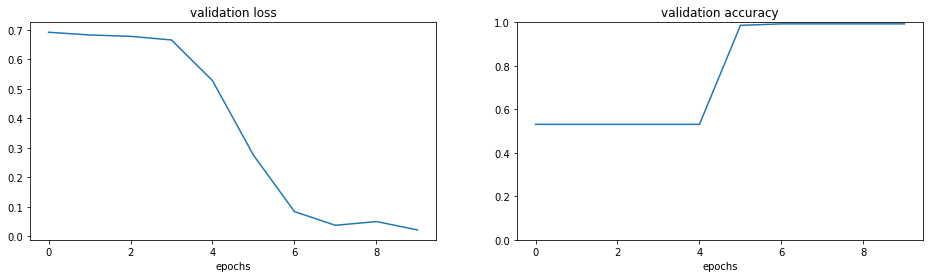

In [32]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [33]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.005758550949394703
Test accuracy: 1.0


In [41]:
vgg = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [42]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [43]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))

Epoch 1/10
6/6 [==============================] - 426s 71s/step - loss: 0.8530 - accuracy: 0.5215 - val_loss: 0.7528 - val_accuracy: 0.4690
Epoch 2/10
6/6 [==============================] - 432s 73s/step - loss: 0.7330 - accuracy: 0.5733 - val_loss: 0.6995 - val_accuracy: 0.5310
Epoch 3/10
6/6 [==============================] - 419s 71s/step - loss: 0.7045 - accuracy: 0.4637 - val_loss: 0.7310 - val_accuracy: 0.5310
Epoch 4/10
6/6 [==============================] - 419s 70s/step - loss: 0.6798 - accuracy: 0.5941 - val_loss: 0.6977 - val_accuracy: 0.5310
Epoch 5/10
6/6 [==============================] - 424s 72s/step - loss: 0.6796 - accuracy: 0.5941 - val_loss: 0.6944 - val_accuracy: 0.4690
Epoch 6/10
6/6 [==============================] - 419s 71s/step - loss: 0.6910 - accuracy: 0.5081 - val_loss: 0.7315 - val_accuracy: 0.5310
Epoch 7/10
6/6 [==============================] - 418s 70s/step - loss: 0.6847 - accuracy: 0.5719 - val_loss: 0.6924 - val_accuracy: 0.5310
Epoch 8/10
6/6 [====

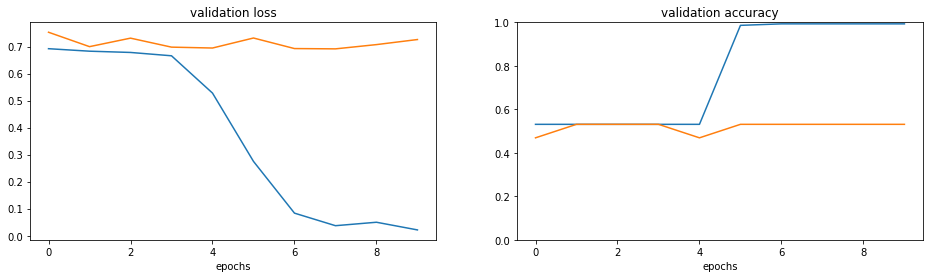

In [46]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [47]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6850087642669678
Test accuracy: 0.5931034684181213


In [ ]:
img, x = get_image('101_ObjectCategories/airplanes/image_0003.jpg')
probabilities = model_new.predict([x])